In [1]:
# Dependencies
import pandas as pd 
import numpy as np
import tweepy
import time
import json
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "HznpSY7QIAZ0EEtgCqUdd7BNG"
consumer_secret = "Avtpeem8WwjI00cqxRULxOMDNw5ObgsNxDJeta6KFaboSjJasl"
access_token = "971785066874580993-NfRif6uDrFp8AubFP5LPolFifn8ftIb"
access_token_secret = "cBWzmchL8BdYHJu9iizq7BGM13Ew7csRK1XdWyCMNKys3"

# Twitter Credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [2]:
# Target Term
#target_term = "#poaching"

# Opening message
#print("We're going live, sir!")

# Search for most recent tweet directed to the account
#public_tweets = api.search(target_term, count=1, result_type="recent")

# Extract all hashtags from tweets directed to the account
#for tweet in public_tweets["statuses"]:

    # Print tweet in JSON
#    print(json.dumps(tweet, sort_keys=True, indent=4, separators=(',', ': ')))

    # Print tweet text
#    print(tweet["text"])

    # Loop through all hashtags and print each one included
#    for hashtag in tweet["entities"]["hashtags"]:
#        print(hashtag["text"])

        

# Target Search Term
target_terms = ("#poaching", "#TrophyBan", "#PreditorsUnderThreat","#endangered")

# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

# Array to hold sentiment
sentiment_array = []

# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
target_list = []

# Variable for holding the oldest tweet
oldest_tweet = ""

# Loop through all target users
for target in target_terms:
    #print("loop thru targets")
    
    # Loop through 10 times (total of 1500 tweets)
    for x in range(10):
        #print("loop thru 10 times")
        # Run search around each tweet
        public_tweets = api.search(target, count=100)#, result_type="popular")

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:
            #print("loop thru tweets")
            # Use filters to check if user meets conditions
            #if (tweet["user"]["followers_count"] < max_followers and
            #    tweet["user"]["statuses_count"] > min_tweets and
            #    tweet["user"]["statuses_count"] < max_tweets and
            #    tweet["user"]["friends_count"] < max_following and
            #        tweet["user"]["lang"] == lang):

            #print(tweet["entities"]["hashtags"])
                
                # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
#            print(target)
            #print(compound)
                
                # Add each value to the appropriate array
            target_list.append(target)
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            
        # Store the Sentiments
#print("before store")
#print(target_list)
sentiment = {"User": target_list,
             "Compound": compound_list,
             "Positive": positive_list,
             "Neutral": negative_list,
             "Negative": neutral_list,
             "Tweet Count": len(compound_list)}

        # Store the Average Sentiments
    #    sentiment = {"User": target,
    #                 "Compound": np.mean(compound_list),
    #                 "Positive": np.mean(positive_list),
    #                 "Neutral": np.mean(negative_list),
    #                 "Negative": np.mean(neutral_list),
    #                 "Tweet Count": len(compound_list)}

sentiment_endangered_df = pd.DataFrame(sentiment)
    # Print the Sentiments
#print(sentiment_endangered_df["Compound"])
#print("")
    
    

In [3]:
print(sentiment_endangered_df["User"])

0         #poaching
1         #poaching
2         #poaching
3         #poaching
4         #poaching
5         #poaching
6         #poaching
7         #poaching
8         #poaching
9         #poaching
10        #poaching
11        #poaching
12        #poaching
13        #poaching
14        #poaching
15        #poaching
16        #poaching
17        #poaching
18        #poaching
19        #poaching
20        #poaching
21        #poaching
22        #poaching
23        #poaching
24        #poaching
25        #poaching
26        #poaching
27        #poaching
28        #poaching
29        #poaching
           ...     
2080    #endangered
2081    #endangered
2082    #endangered
2083    #endangered
2084    #endangered
2085    #endangered
2086    #endangered
2087    #endangered
2088    #endangered
2089    #endangered
2090    #endangered
2091    #endangered
2092    #endangered
2093    #endangered
2094    #endangered
2095    #endangered
2096    #endangered
2097    #endangered
2098    #endangered


In [4]:
sentiment_poaching_df = pd.DataFrame(sentiment_endangered_df.loc[sentiment_endangered_df["User"]=="#poaching"])
sentiment_trophyban_df = pd.DataFrame(sentiment_endangered_df.loc[sentiment_endangered_df["User"]=="#TrophyBan"])
sentiment_Preditors_df = pd.DataFrame(sentiment_endangered_df.loc[sentiment_endangered_df["User"]=="#PreditorsUnderThreat"])
sentiment_endangeredtag_df = pd.DataFrame(sentiment_endangered_df.loc[sentiment_endangered_df["User"]=="#endangered"])

#"#poaching", "#TrophyBan", "#PreditorsUnderThreat","#endangered"
#print(sentiment_endangered_df["User"])
#print(sentiment_poaching_df["Compound"])

print(np.mean(sentiment_poaching_df["Compound"]))
print(np.mean(sentiment_trophyban_df["Compound"]))
print(np.mean(sentiment_Preditors_df["Compound"]))
print(np.mean(sentiment_endangeredtag_df["Compound"]))

print("")

0.01790700000000003
0.2252727272727273
nan
0.10114499999999964



[0.01790700000000003, 0.2252727272727273, nan, 0.10114499999999964]


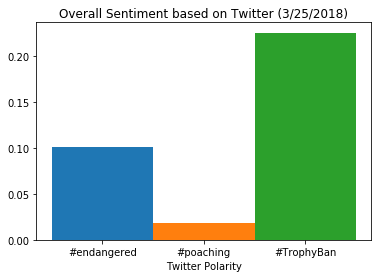

In [17]:
mean_list = []

mean_list.append(np.mean(sentiment_poaching_df["Compound"]))
mean_list.append(np.mean(sentiment_trophyban_df["Compound"]))
mean_list.append(np.mean(sentiment_Preditors_df["Compound"]))
mean_list.append(np.mean(sentiment_endangeredtag_df["Compound"]))

print(mean_list)

plt.bar(sentiment_endangeredtag_df["User"], np.mean(sentiment_endangeredtag_df["Compound"]), width = 1, label="#endangered")
plt.bar(sentiment_poaching_df["User"], np.mean(sentiment_poaching_df["Compound"]), width = 1, label = "#poaching")
plt.bar(sentiment_trophyban_df["User"], np.mean(sentiment_trophyban_df["Compound"]),width = 1, label = "#TrophyBan")
plt.bar(sentiment_Preditors_df["User"], np.mean(sentiment_Preditors_df["Compound"]), width = 1, label = "#Preditors")

plt.title("Overall Sentiment based on Twitter (3/25/2018)")
plt.xlabel("Twitter Polarity")

#N=5
#ind = np.arange(N)  # the x locations for the groups
#width = 0.35       # the width of the bars

#fig, ax = plt.subplots()
#rects1 = ax.bar(ind, mean_list)

#def autolabel(rects):
#    """
#    Attach a text label above each bar displaying its height
#    """
#    for rect in rects:
#        height = rect.get_height()
#        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                '%d' % int(height),
#                ha='center', va='bottom')

#autolabel(rects1)
#plt.legend(title="Hashtags")
plt.show()

plt.savefig("Sentiment_Bar")


In [12]:
# Target Term
#target_term = "#poaching"

# Opening message
#print("We're going live, sir!")

# Search for most recent tweet directed to the account
#public_tweets = api.search(target_term, count=1, result_type="recent")

# Extract all hashtags from tweets directed to the account
#for tweet in public_tweets["statuses"]:

    # Print tweet in JSON
#    print(json.dumps(tweet, sort_keys=True, indent=4, separators=(',', ': ')))

    # Print tweet text
#    print(tweet["text"])

    # Loop through all hashtags and print each one included
#    for hashtag in tweet["entities"]["hashtags"]:
#        print(hashtag["text"])

        

# Target Search Term
target_terms = ("#HERMES", "#AlligatorShoes", "#Caviar","#LouisVuitton","#Gucci")

# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

# Array to hold sentiment
sentiment_products_array = []

# Variables for holding sentiments
target_product_list = []
compound_product_list = []
positive_product_list = []
negative_product_list = []
neutral_product_list = []

# Variable for holding the oldest tweet
oldest_product_tweet = ""

# Loop through all target users
for target in target_terms:

    # Loop through 10 times (total of 1500 tweets)
    for x in range(10):

        # Run search around each tweet
        public_products_tweets = api.search(target, count=100)#, result_type="recent")

        # Loop through all tweets
        for tweet in public_products_tweets["statuses"]:
            #print(target)
            # Use filters to check if user meets conditions
            #if (tweet["user"]["followers_count"] < max_followers and
            #    tweet["user"]["statuses_count"] > min_tweets and
            #    tweet["user"]["statuses_count"] < max_tweets and
            #    tweet["user"]["friends_count"] < max_following and
            #        tweet["user"]["lang"] == lang):

                #print(tweet["text"])
                
                # Run Vader Analysis on each tweet
            compound_product = analyzer.polarity_scores(tweet["text"])["compound"]
            pos_product = analyzer.polarity_scores(tweet["text"])["pos"]
            neu_product = analyzer.polarity_scores(tweet["text"])["neu"]
            neg_product = analyzer.polarity_scores(tweet["text"])["neg"]
            #print(compound)

            # Add each value to the appropriate array
            #print(target)
            target_product_list.append(target)
            compound_product_list.append(compound_product)
            positive_product_list.append(pos_product)
            negative_product_list.append(neg_product)
            neutral_product_list.append(neu_product)
            
        # Store the Sentiments
#print("before store")
#print(target_list)
sentiment_product = {"User": target_product_list,
        "Compound": compound_product_list,
        "Positive": positive_product_list,
        "Neutral": negative_product_list,
        "Negative": neutral_product_list,
        "Tweet Count": len(compound_product_list)}

# Print the Sentiments
#print(sentiment_product)
#print("")

 

In [14]:
#print(sentiment_product["User"])
sentiment_product_df = pd.DataFrame(sentiment_product)

['#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES', '#HERMES'

In [15]:
sentiment_HERMES_df = pd.DataFrame(sentiment_product_df.loc[sentiment_product_df["User"]=="#HERMES"])
sentiment_AlligatorShoes_df = pd.DataFrame(sentiment_product_df.loc[sentiment_product_df["User"]=="#AlligatorShoes"])
sentiment_Caviar_df = pd.DataFrame(sentiment_product_df.loc[sentiment_product_df["User"]=="#Caviar"])
sentiment_LV_df = pd.DataFrame(sentiment_product_df.loc[sentiment_product_df["User"]=="#LouisVuitton"])
sentiment_Gucci_df = pd.DataFrame(sentiment_product_df.loc[sentiment_product_df["User"]=="#Gucci"])
#"#HERMES", "#AlligatorShoes", "#Caviar","#Louis Vuitton","#Gucci"

print(sentiment_HERMES_df.head(2))
print(sentiment_AlligatorShoes_df.head(2))
print(sentiment_LV_df.head(2))
print(sentiment_Caviar_df.head(2))
print(sentiment_Gucci_df.head(2))
#"#poaching", "#TrophyBan", "#PreditorsUnderThreat","#endangered"
#print(sentiment_endangered_df["User"])
#print(sentiment_poaching_df["Compound"])

print(np.mean(sentiment_HERMES_df["Compound"]))
print(np.mean(sentiment_AlligatorShoes_df["Compound"]))
print(np.mean(sentiment_Caviar_df["Compound"]))
print(np.mean(sentiment_LV_df["Compound"]))
print(np.mean(sentiment_Gucci_df["Compound"]))

print("")

   Compound  Negative  Neutral  Positive  Tweet Count     User
0    0.3182     0.777      0.0     0.223         3660  #HERMES
1    0.0000     1.000      0.0     0.000         3660  #HERMES
     Compound  Negative  Neutral  Positive  Tweet Count             User
920    0.4215     0.817      0.0     0.183         3660  #AlligatorShoes
921    0.4215     0.787      0.0     0.213         3660  #AlligatorShoes
      Compound  Negative  Neutral  Positive  Tweet Count           User
1750       0.0       1.0      0.0       0.0         3660  #LouisVuitton
1751       0.0       1.0      0.0       0.0         3660  #LouisVuitton
     Compound  Negative  Neutral  Positive  Tweet Count     User
940    0.5719     0.684      0.0     0.316         3660  #Caviar
941    0.0000     1.000      0.0     0.000         3660  #Caviar
      Compound  Negative  Neutral  Positive  Tweet Count    User
2750    0.0000     1.000      0.0     0.000         3660  #Gucci
2751    0.5994     0.782      0.0     0.218        

[0.01899239130434785, 0.4215, 0.2011283950617283, 0.05781600000000004, 0.28988131868131883]


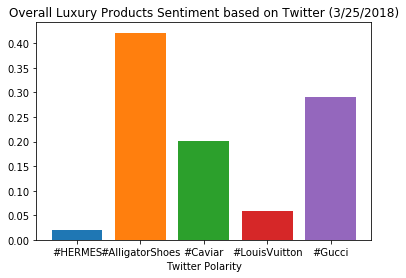

In [16]:
#target_terms = ("#HERMES", "#AlligatorShoes", "#Caviar","Louis Vuitton","Gucci")
mean_product_list = []

mean_product_list.append(np.mean(sentiment_HERMES_df["Compound"]))
mean_product_list.append(np.mean(sentiment_AlligatorShoes_df["Compound"]))
mean_product_list.append(np.mean(sentiment_Caviar_df["Compound"]))
mean_product_list.append(np.mean(sentiment_LV_df["Compound"]))
mean_product_list.append(np.mean(sentiment_Gucci_df["Compound"]))


print(mean_product_list)

rects1 = plt.bar(sentiment_HERMES_df["User"], np.mean(sentiment_HERMES_df["Compound"]))
plt.bar(sentiment_AlligatorShoes_df["User"], np.mean(sentiment_AlligatorShoes_df["Compound"]))
plt.bar(sentiment_Caviar_df["User"], np.mean(sentiment_Caviar_df["Compound"]))
plt.bar(sentiment_LV_df["User"], np.mean(sentiment_LV_df["Compound"]))
plt.bar(sentiment_Gucci_df["User"], np.mean(sentiment_Gucci_df["Compound"]))


plt.title("Overall Luxury Products Sentiment based on Twitter (3/25/2018)")
plt.xlabel("Twitter Polarity")

#N=5
#ind = np.arange(N)  # the x locations for the groups
#width = 0.35       # the width of the bars

#fig, ax = plt.subplots()
#rects1 = ax.bar(ind, mean_list)

#def autolabel(rects):
#    """
#    Attach a text label above each bar displaying its height
#    """
#    for rect in rects:
#        height = rect.get_height()
#        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                '%d' % int(height),
#                ha='center', va='bottom')

#autolabel(rects1)

plt.show()

plt.savefig("LuxaryProductsSentiment_Bar")
